# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
sign_names = pd.read_csv('signnames.csv')

#### Plot 1: traffic sign counts

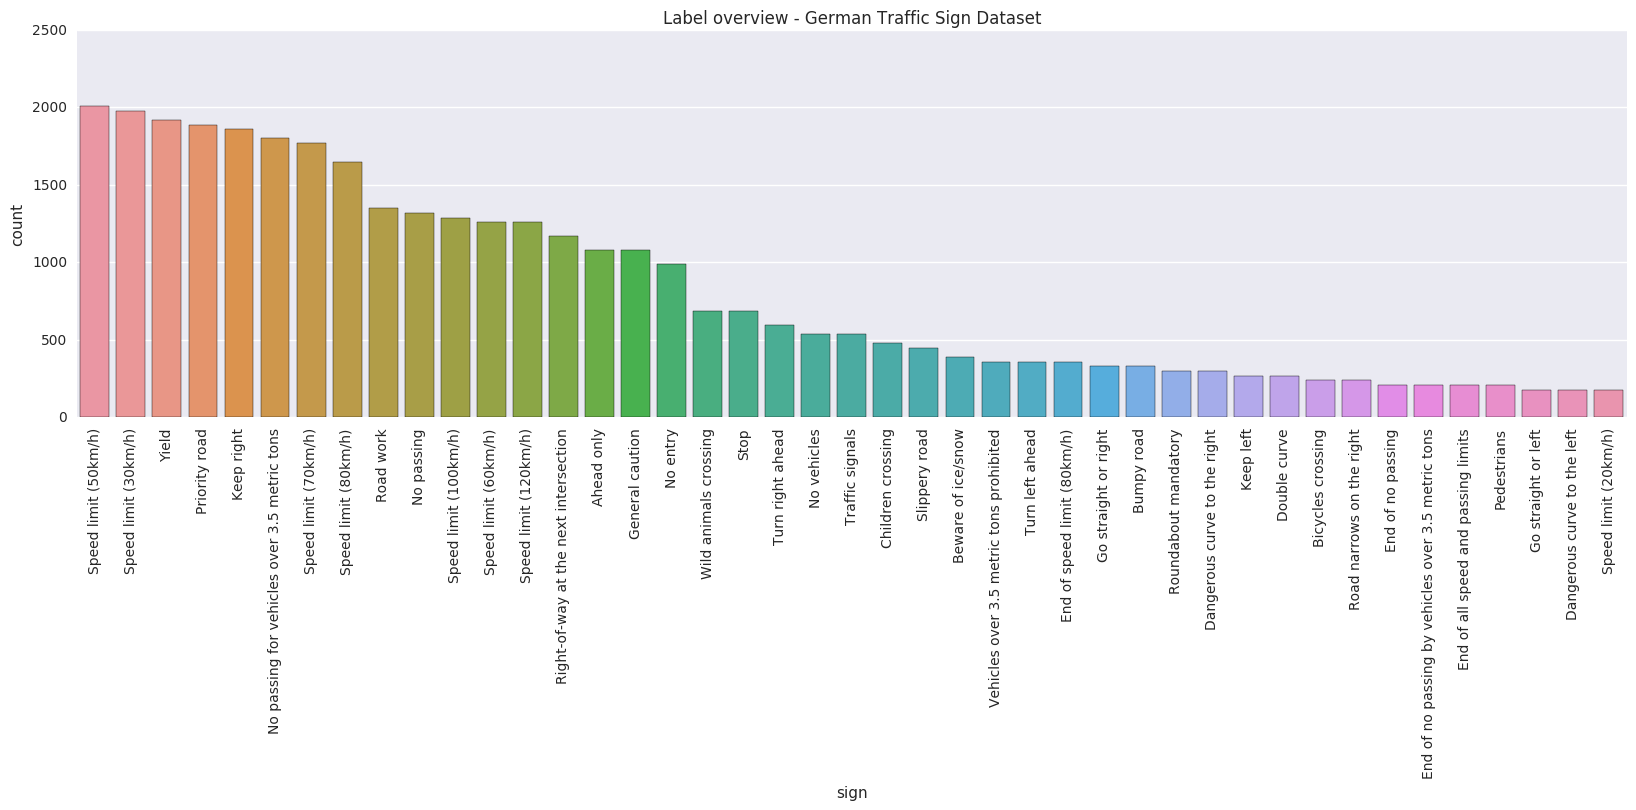

In [5]:
plt.figure(figsize=(20,5))
train_counts = np.unique(y_train,return_counts=True)
train_counts = pd.DataFrame(np.array(train_counts).T,columns=["sign","count"])
train_counts["sign"] = train_counts["sign"].apply(lambda x: sign_names[sign_names['ClassId']==x]['SignName'].iloc[0])


sns.barplot(data=train_counts.sort_values(by="count",ascending=False),x="sign",y="count")
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title("Label overview - German Traffic Sign Dataset")

#### Plot 2: Plot one example image per sign class

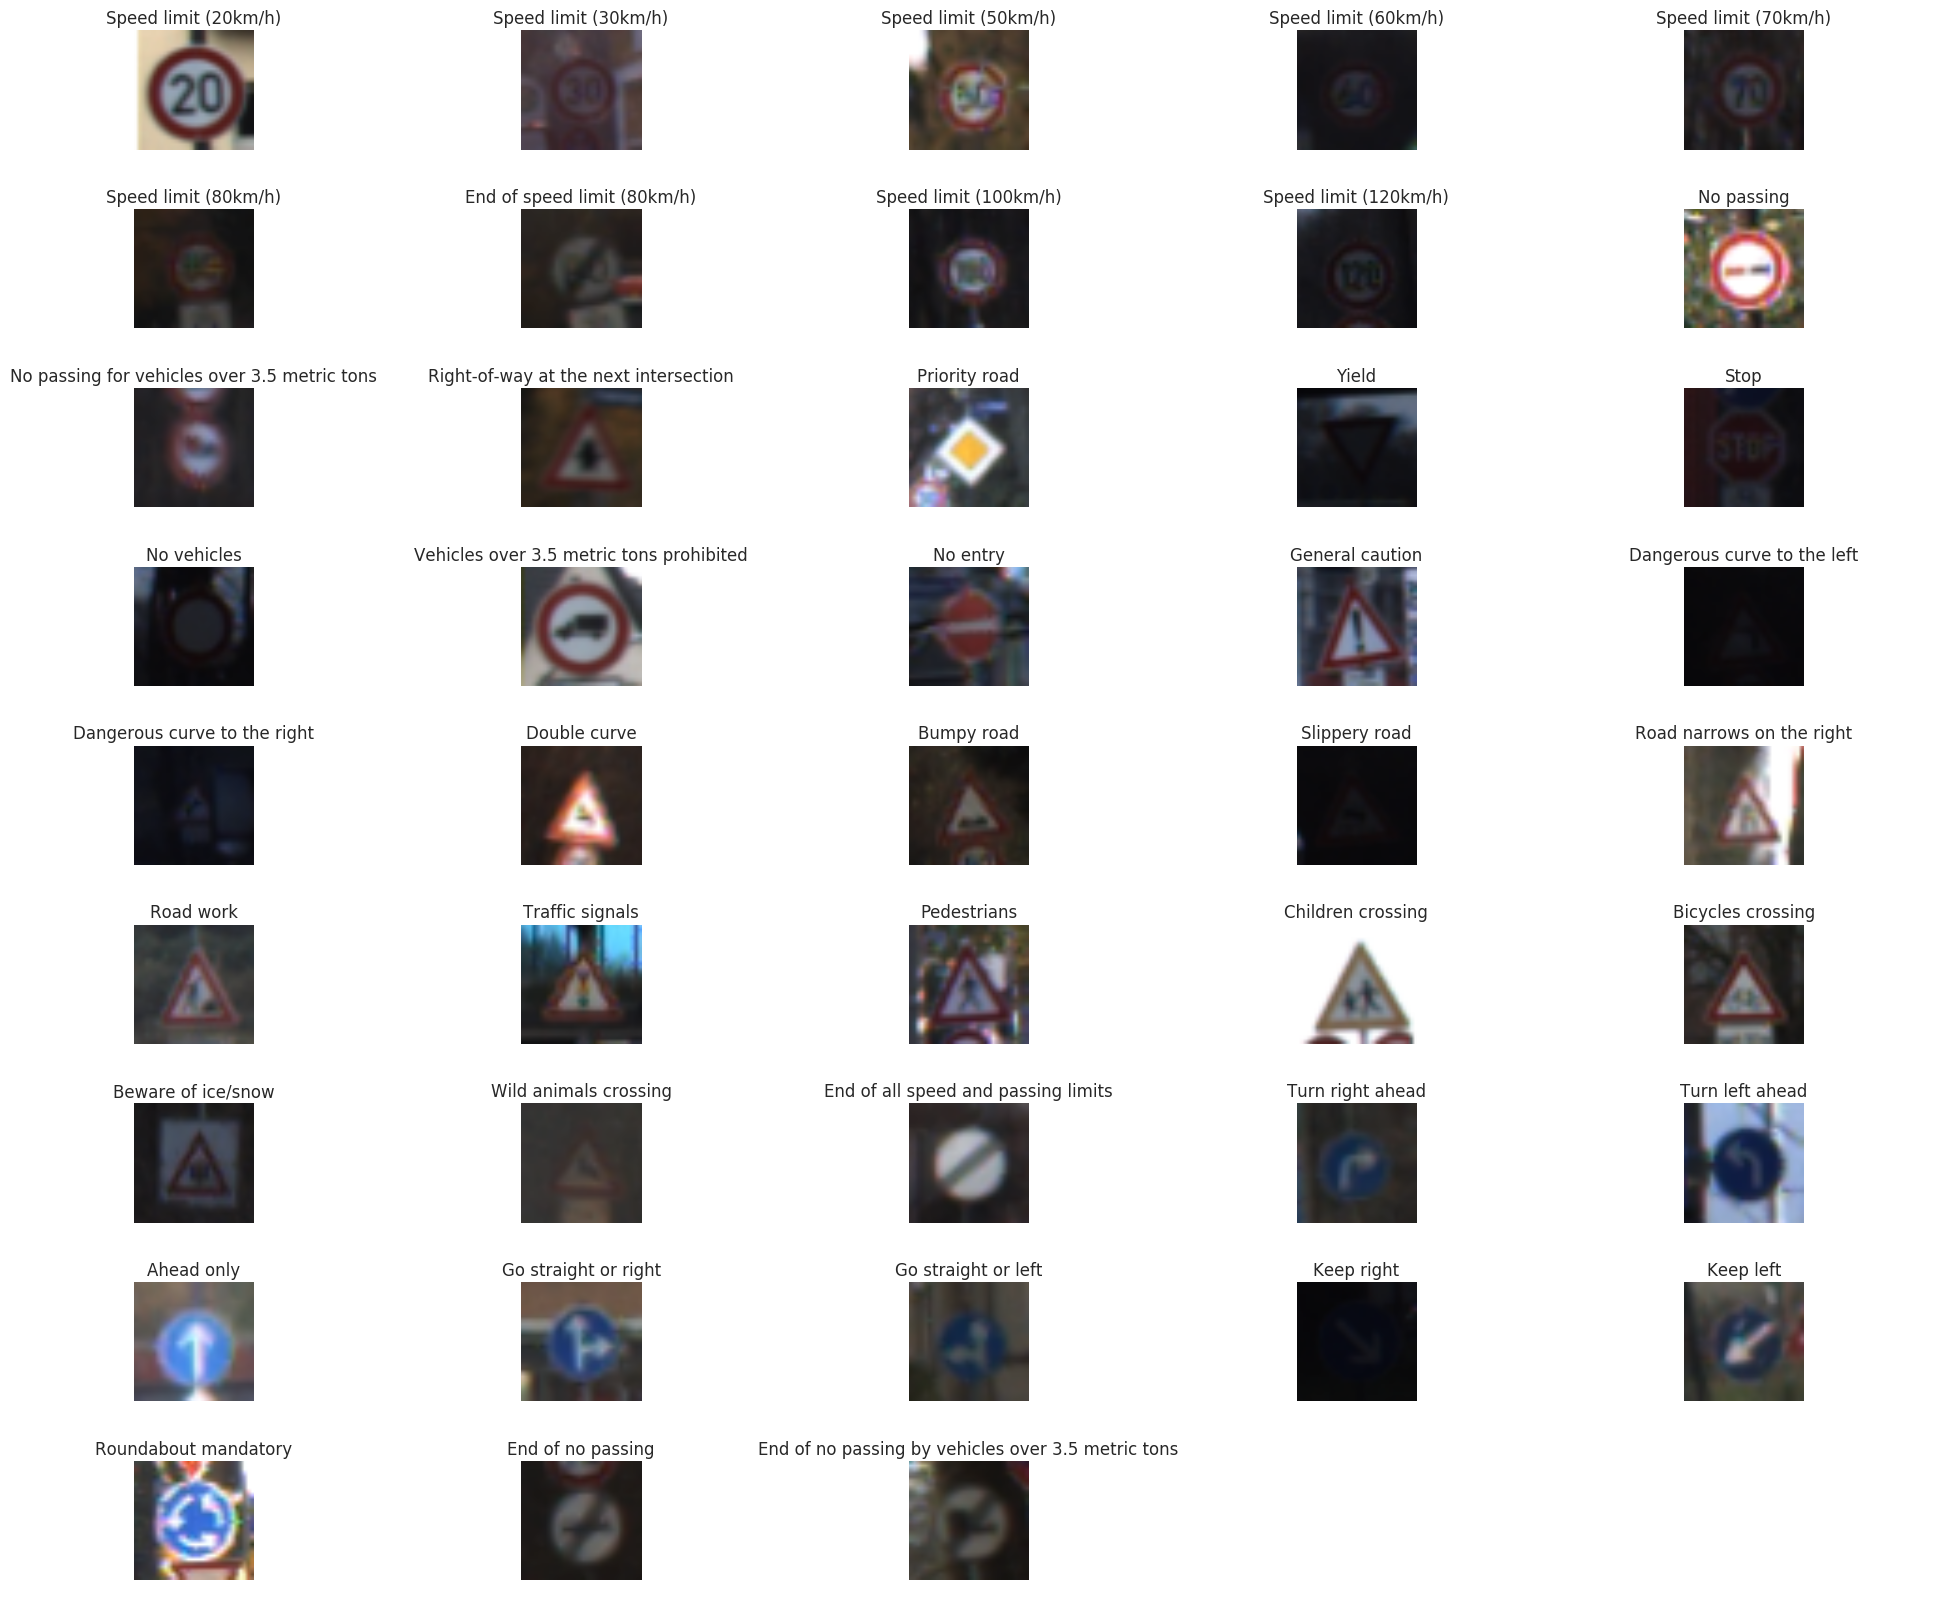

In [6]:
X_examples = []
y_examples = []

for sign in np.unique(y_train):
    X_tmp = X_train[y_train==sign][0]
    X_examples.append(X_tmp)
    y_examples.append(sign_names[sign_names['ClassId']==sign]['SignName'].iloc[0])
    
fig, axs = plt.subplots(9,5, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(n_classes):

    axs[i].imshow(X_examples[i])
    axs[i].set_title(y_examples[i])

for ax in axs:
    ax.axis('off')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Calculate mean and std for normalization only on X_train to avoid data leakage
### Normalization will be applied after augmentation (could also do this before)

### Convert to grayscale
X_train = (X_train.mean(axis=3).reshape(-1,32,32)) #/ training_std
X_valid = (X_valid.mean(axis=3).reshape(-1,32,32)) #/ training_std
X_test = (X_test.mean(axis=3).reshape(-1,32,32)) #/ training_std

training_mean = X_train.mean()
training_std = X_train.std()

In [8]:
import cv2

### Implement two augmentation methods to rotate and zoom into the images

def aug_rotate(img):   
    rows,cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),np.random.randint(20),1)
    return cv2.warpAffine(img,M,(cols,rows))

def aug_zoom(img):
    zoom_factor = np.random.uniform(low=0.4,high=0.98)
    img = cv2.resize(img,(0,0),fx=zoom_factor, fy=zoom_factor, interpolation = cv2.INTER_CUBIC)
    rows, cols = img.shape
    img = np.pad(img,(32-rows,32-cols),mode='mean')
    img = cv2.resize(img,(32,32))
    return img

In [9]:
### Upsample the dataset with augmentation, so that every class is represented by at least 1000 examples

X_aug = []
y_aug = []

min_count = 1000

for n_class in range(n_classes):
    class_idxs = np.arange(len(X_train))[y_train==n_class]
    class_count = len(class_idxs)
    if(class_count < min_count):
        
        delta = min_count - class_count
        
        for i in range(delta):
            img = X_train[class_idxs[np.random.randint(len(class_idxs))]]
            img = aug_rotate(img)
            img = aug_zoom(img)
            
            X_aug.append(img)
            y_aug.append(n_class)

X_aug = np.asarray(X_aug)
y_aug = np.asarray(y_aug)

X_train = np.vstack([X_train,X_aug])
y_train = np.hstack([y_train,y_aug])

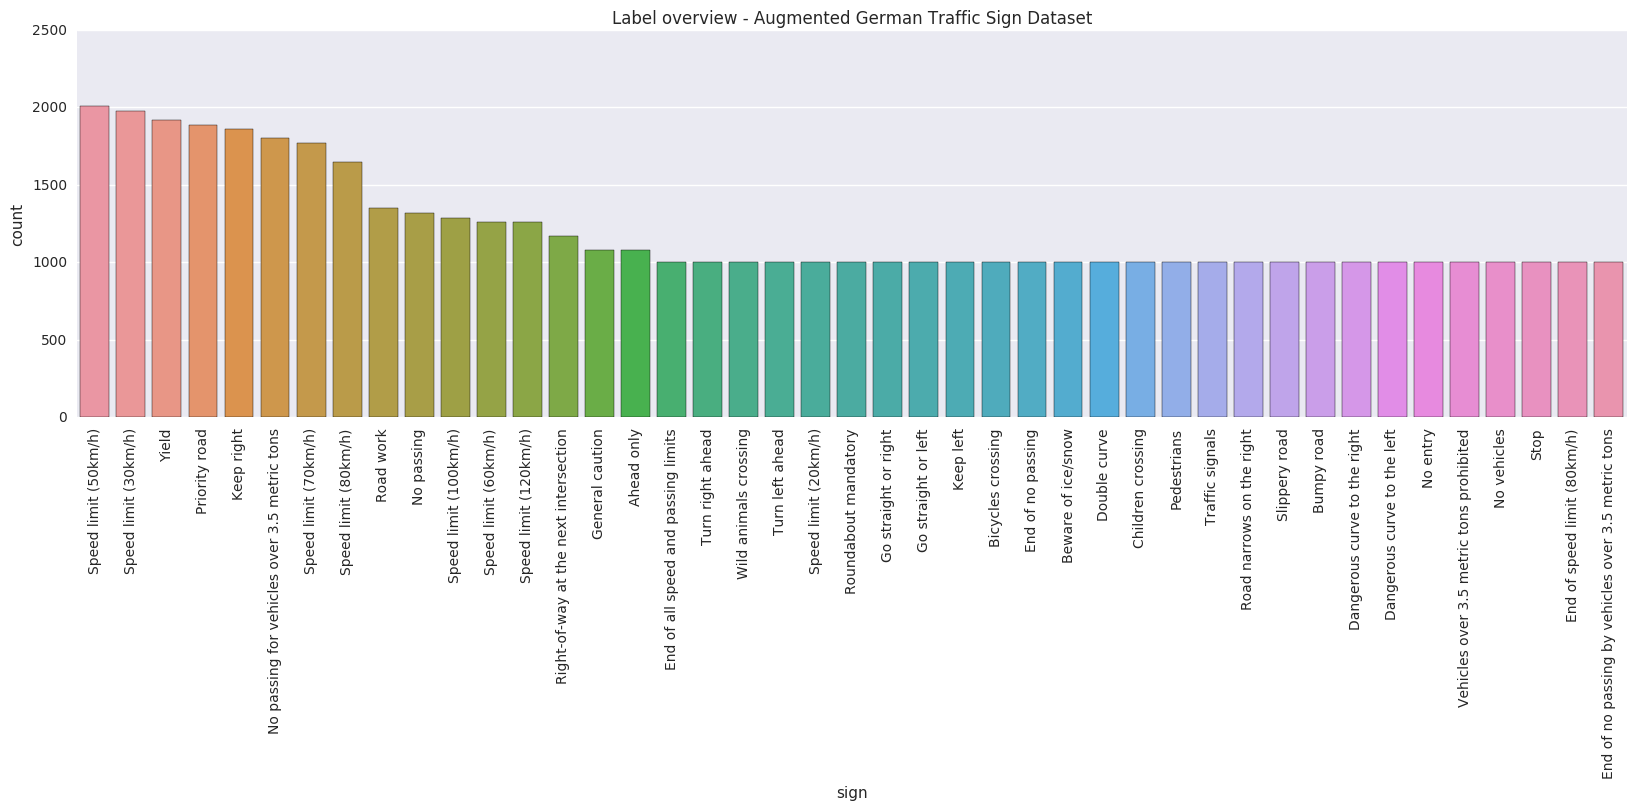

In [10]:
### Check the class distribution now to validate the upsampling

plt.figure(figsize=(20,5))
train_counts = np.unique(y_train,return_counts=True)
train_counts = pd.DataFrame(np.array(train_counts).T,columns=["sign","count"])
train_counts["sign"] = train_counts["sign"].apply(lambda x: sign_names[sign_names['ClassId']==x]['SignName'].iloc[0])

sns.barplot(data=train_counts.sort_values(by="count",ascending=False),x="sign",y="count")
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title("Label overview - Augmented German Traffic Sign Dataset")

In [11]:
### Perform zero-mean and unit-variance transformation and reshape for tensorflow

X_valid = (X_valid-training_mean)/training_std
X_test = (X_test-training_mean)/training_std
X_train = (X_train-training_mean)/training_std

X_train = (X_train.reshape(-1,32,32,1)) 
X_valid = (X_valid.reshape(-1,32,32,1)) 
X_test = (X_test.reshape(-1,32,32,1)) 


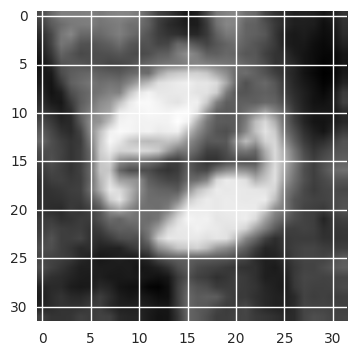

In [12]:
### Sanity check if images still look valid
plt.imshow(X_train[192][:,:,0],cmap="gray")

### Model Architecture

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Regarding the model architecture I created a model inspired by the LeNet in the lecture. 
### In fact it's a quite shallow network with two convolutional layers with max-pooling, two fully connected hidden layers and one softmax layer for the output.
### Both conv-layers share the same filter count and filter sizes.

x = tf.placeholder(tf.float32,[None,X_train.shape[1],X_train.shape[2],X_train.shape[3]])
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,n_classes)
keep_prob = tf.placeholder(tf.float32)

mu = 0
sigma = 0.1

n_filter = 32
filter_size = 5

def DominikNet(x):
    ### First convolution layer 
    conv1_w = tf.Variable(tf.truncated_normal(shape=[filter_size,filter_size,X_train.shape[3],n_filter], mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(n_filter))
    conv1 = tf.nn.conv2d(x,conv1_w,strides=[1,1,1,1],padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    #### Max Pool 
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    ### Second convolution layer 
    conv2_w = tf.Variable(tf.truncated_normal(shape=[filter_size,filter_size,n_filter,n_filter], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(n_filter))
    conv2 = tf.nn.conv2d(conv1,conv2_w,strides=[1,1,1,1],padding='VALID',name="conv2") + conv2_b
    conv2 = tf.nn.relu(conv2)

    #### Max Pool 
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')


    ### Flatten layer
    fc0 = flatten(conv2)

    ### Fully connected relu-layer
    fc1_w = tf.Variable(tf.truncated_normal(shape=(800,256), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1 = tf.matmul(fc0,fc1_w) + fc1_b
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    ### Fully connected relu-layer
    fc2_w = tf.Variable(tf.truncated_normal(shape=(256,128), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(128))
    fc2 = tf.matmul(fc1,fc2_w, name="fc2") + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    ### Fully connected logits-layer
    fc3_w = tf.Variable(tf.truncated_normal(shape=(128,n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2,fc3_w, name="fc3") + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### For training and validation I did use code similar to the one of the LeNet lecture.
### Instead of Adam I chose RMSprop for optimization

rate = 0.001

logits = DominikNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.RMSPropOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    n_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, n_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        ### Since I use dropout, we must set the keep_prop to 1.0 during validation
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / n_examples

In [ ]:
from sklearn.utils import shuffle

n_epoch = 25
batch_size = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    n_examples = len(X_train)
    print("Training...")
    print()
    for i in range(n_epoch):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            ### Dropout set to 0.5
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        print("Epoch {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("----------------------------")
        
    saver.save(sess, 'dominiknet')
    print("Model saved")

Training...



### Evaluate on test set

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('dominiknet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

You can find the example images I used for testing with the following URLs: 
- 'http://s.hswstatic.com/gif/autobahn-3.jpg'
- 'http://media.gettyimages.com/photos/german-traffic-signs-picture-id459381093?s=170667a'
- 'https://upload.wikimedia.org/wikipedia/commons/0/00/Traffic_sign_Slope_Gef%C3%A4lle_20_per_cent_(Germany).JPG'
- 'http://mathewiki.hermann-stubbe.de/images/7/7a/Vorfahrtsschild.png'
- 'https://www.bussgeldkatalog.org/wp-content/uploads/vorfahrtsschild-300x199.jpg'
- 'http://www.hannover.de/var/storage/images/media/01-data-neu/bilder/bilder-region-hannover/wiederverwendbar/baustelle-verbot-der-einfahrt/8717728-1-ger-DE/Baustelle-Verbot-der-Einfahrt_alias_300x225px.jpg'
- 'https://us.123rf.com/450wm/ginasanders/ginasanders1505/ginasanders150500635/40504733-eine-stra-e-baustelle-wird-durch-mehrere-verkehrszeichen-gesch-tzt.jpg?ver=6'

### Load and Output the Images

In [ ]:
import glob

example_images = glob.glob("examples/dominik/*")

X_example = []
y_example = []
for img in example_images: 
    y_example.append(img.split(".")[0].split("/")[2])
    img = plt.imread(img)
    img = img.mean(axis=2)
    img = cv2.resize(img,(32,32))
    img = (img - training_mean)/training_std
    X_example.append(img)
    
    
### Visualize the reshaped test traffic signs (you can barely recognize some of them now imho)

fig, axs = plt.subplots(1,5, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(len(axs)):
    axs[i].imshow(X_example[i], cmap="gray")

for ax in axs:
    ax.axis('off')
    
X_example = np.asarray(X_example)
y_example = np.asarray(y_example)
X_example = X_example.reshape(X_example.shape[0],X_example.shape[1],X_example.shape[2],1)

### Predict the Sign Type for Each Image

In [ ]:
predictions = None

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('dominiknet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    sess = tf.get_default_session()
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x:X_example, keep_prob:1.0})

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(20, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .001, wspace=.1)

axs = axs.ravel()

example_images = glob.glob("examples/dominik/*")

for i in range(len(predictions)):
    img = plt.imread(example_images[i])
    img = cv2.resize(img,(100,100))
    axs[i].imshow(img)
    axs[i].set_title(sign_names[sign_names['ClassId']==predictions[i]]['SignName'].iloc[0])

for ax in axs:
    ax.axis('off')


### Analyze Performance

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('dominiknet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_example, y_example)
    print("Test Accuracy second stage = {:.3f}".format(test_accuracy))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('dominiknet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    sess = tf.get_default_session()
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 3), feed_dict={x:X_example, keep_prob:1.0})


In [ ]:
### Looking at the softmax probabilities we see a very high confidence for the top class.
### Of course, by giving non-cropped images we wouldn't get as confident predictions
### so this indicates that we maybe made it too easy for our model.

print(output)

## Step 4: Visualize the Neural Network's State with Test Images

This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.
Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the LeNet lab's feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.
For an example of what feature map outputs look like, check out NVIDIA's results in their paper End-to-End Deep Learning for Self-Driving Cars in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        plt.axis('off')

In [ ]:
### To get the outputFeatureMap method working I used the replies of Franscesco_F in https://discussions.udacity.com/t/argh-outputfeaturemap/228295/3 as help.
### I used the image of "no entry allowed" as an example, since it's easy to understand. I would expect that especially the thick white bar in the middle gets highlited, since thats maybe the most important feature of the sign.
### As expected, the second convolutional layers seems to have some focus on this feature. 

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('dominiknet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    tensor = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap([X_example[3]], tensor)
    plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 